In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.load_model('dino_dragon_10_0.899.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('dino-vs-dragon.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [ ]:
!ls -lh dino-vs-dragon.tflite

-rw-r--r-- 1 root root 43M Nov 17 22:00 dino-vs-dragon.tflite


In [ ]:
import tensorflow.lite as tflite

In [ ]:
interpreter = tflite.Interpreter(model_path='dino-vs-dragon.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [ ]:
output_index

13

In [ ]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

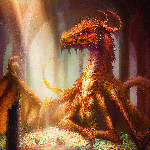

In [ ]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Smaug_par_David_Demaret.jpg/1280px-Smaug_par_David_Demaret.jpg')
img = prepare_image(img, target_size=(150, 150))
img

In [ ]:
import numpy as np

In [ ]:
def prepare_input(x):
    return x / 255.0

In [ ]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [ ]:
X[0, 0, 0, 0]

0.5529412

In [ ]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()

preds = interpreter.get_tensor(output_index)

In [ ]:
preds

array([[0.82448614]], dtype=float32)